In [48]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [71]:
def flip_coins(num_coins, num_flips):
    C = np.random.randint(2, size=(num_coins, num_flips))
    min_index = np.argmin(np.sum(C, axis=1))
    rand_index = np.random.randint(num_coins)
    # print min_index, rand_index
#     v_min = np.sum(C[min_index,:])/float(num_flips)
#     v_rand = np.sum(C[rand_index,:])/float(num_flips)
#     v_1 = np.sum(C[1,:])/float(num_flips)
    min_sum = np.sum(C[min_index,:])
    rand_sum = np.sum(C[rand_index,:])
    one_sum = np.sum(C[1,:])
    return min_sum, rand_sum, one_sum


In [99]:
def plot_histogram(range, weights, bins):
    plt.hist(range, weights=weights, bins=bins)
    plt.show()

In [100]:
def hoeffding_experiment(num_run_times, num_coins, num_flips):
    min_sum = 0
    rand_sum = 0
    one_sum = 0
    min_sum_hist = np.zeros([num_flips+1,1])
    rand_sum_hist = np.zeros([num_flips+1,1])
    one_sum_hist = np.zeros([num_flips+1,1])
    
    for run_num in xrange(num_run_times):
        min_sum_, rand_sum_, one_sum_ = flip_coins(num_coins, num_flips)
        rand_sum += rand_sum_
        one_sum += one_sum_
        min_sum_hist[min_sum_] += 1
        rand_sum_hist[rand_sum_] += 1
        one_sum_hist[one_sum_] += 1
    
    plot_histogram(range(0,11), weights=rand_sum_hist, bins=11)
    plot_histogram(range(0,11), weights=min_sum_hist, bins=11)
    plot_histogram(range(0,11), weights=one_sum_hist, bins=11)
    
    print "min average: ", min_sum/(float(num_run_times) * num_flips)
    print "one average: ", one_sum/(float(num_run_times) * num_flips)
    print "rand average: ", rand_sum/(float(num_run_times) * num_flips)

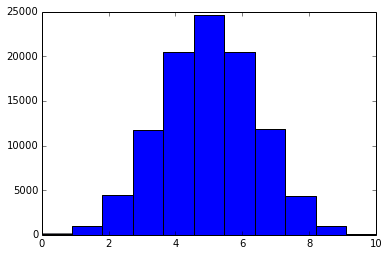

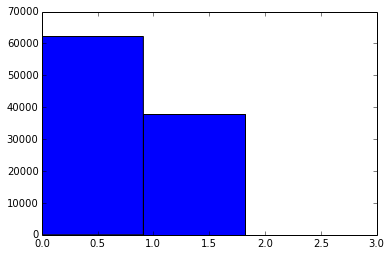

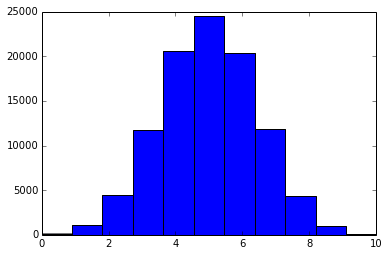

min average:  0.0
one average:  0.499378
rand average:  0.50009


In [102]:
num_coins = 1000
num_flips = 10
num_run_times = 100000
min_sum = 0

hoeffding_experiment(num_run_times, num_coins, num_flips)

In [103]:
%magic #linear regression

In [214]:
import copy
import numpy as np
import matplotlib.pyplot as plt
import random

from numpy.linalg import inv

def generate_dataset(num_of_points=10):
    X = np.ones((num_of_points, 3)) # these are 1 because of x0 = 1 for the constant term
    X[:, 1:] = np.random.uniform(-1, 1, (num_of_points, 2))
    return X

def classify(X, w, y=None):
    return np.sign(np.dot(X, w))

def get_average_num_iterations(num_runs=1, num_training_points=10, num_test_points=1000, plot=False):
    num_iteration = np.zeros((num_runs, 1))
    num_prob = np.zeros((num_runs, 1))
    index = 0

    while index < num_runs:
        num_iteration[index], num_prob[index] = iterate(num_training_points, num_test_points, plot)
        index += 1

    return np.sum(num_iteration)/num_runs, np.sum(num_prob)/num_runs

def pla_iterate(num_training_points, num_test_points, plot, coeff=None, X=None, w=None):
    # create target function and training set
    if coeff is None:
        coeff = np.random.uniform(-1, 1, (3, 1))
    if X is None:
        X = generate_dataset(num_training_points)
    y_true = classify(X, coeff)

    # initialize weights
    if w is None:
        w = np.zeros((3, 1))
    num_iterations = 0

    # inputs: X, w, y_true
    (num_iterations, w) = get_weights_pla(X, w, y_true)
    while True:
        y = classify(X, w)
        error_indexes = copy.copy(np.where(y != y_true)[0]) # take first element because that contains the indices
  
        if len(error_indexes) > 0:
            np.random.shuffle(error_indexes)
            chosen_index = error_indexes[0]

            chosen_x = X[chosen_index,:]
            chosen_x = chosen_x.reshape(3,1) # need to reshape to create a column vector of these values
            w = w + y_true[chosen_index] * chosen_x

            num_iterations += 1
        else:
            break

    # test how well w classifies the training points
    X_test = generate_dataset(num_test_points)
    y_true = classify(X_test, coeff)
    y = classify(X_test, w)
    sample_prob = np.sum(y != y_true)/float(num_test_points)

    if plot:
        plot_points(X, coeff, w)

    return num_iterations, sample_prob

def plot_points(X, coeff, w):
    x = np.arange(-2, 2, 0.2)
    plt.plot(x, (-coeff[1]*x - coeff[0])/coeff[2], '--')
    plt.plot(x, (-w[1]*x - w[0])/w[2], 'r--')
    y_true = classify(X, coeff)

    for num in xrange(len(y_true)):
        if y_true[num] > 0:
            plt.plot(X[num][1], X[num][2], 'r+')
        else:
            plt.plot(X[num][1], X[num][2], 'ro')

    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.show()

In [ ]:
def get_weights_pla(X, w, y_true):
    num_iterations = 0
    
    while True:
        y = classify(X, w)
        error_indexes = copy.copy(np.where(y != y_true)[0]) # take first element because that contains the indices
  
        if len(error_indexes) > 0:
            np.random.shuffle(error_indexes)
            chosen_index = error_indexes[0]

            chosen_x = X[chosen_index,:]
            chosen_x = chosen_x.reshape(3,1) # need to reshape to create a column vector of these values
            w = w + y_true[chosen_index] * chosen_x

            num_iterations += 1
        else:
            break
    
    return (num_iterations, w)

In [ ]:
def get_performance(num_test_points, coeff, w, X_test=None):
    if X_test is None:
        X_test = generate_dataset(num_test_points)
    y_true = classify(X_test, coeff)
    y = classify(X_test, w)
    sample_error_prob = np.sum(y != y_true)/float(num_test_points)
    
    return sample_error_prob

In [215]:
def linear_regression_train(num_training_points, coeff, X=None):
    if X is None:
        X = generate_dataset(num_training_points)
    y = classify(X, coeff)
    
    pseudo_inv_X = np.dot(inv(np.dot(X.T, X)), X.T)
    w = np.dot(pseudo_inv_X, y)
    
    y_w = classify(X, w)
    num_misclassified_points = np.sum(y_w != y)
    
    return (w, num_misclassified_points / float(num_training_points))

def linear_regression_test(num_test_points, coeff, w):
    X = generate_dataset(num_test_points)
    y = classify(X, coeff)
    
    y_w = classify(X, w)
    num_misclassified_points = np.sum(y_w != y)
            
    return num_misclassified_points / float(num_test_points)

In [216]:
def get_average_sample_error(num_runs, num_training_points, num_test_points, plot=False):
    in_sample_error = 0
    out_sample_error = 0
    iteration = 0
        
    while iteration < num_runs:
        coeff = np.random.uniform(-1, 1, (3, 1))
        (w, in_sample_error_iteration) = linear_regression_train(num_training_points, coeff)
        out_sample_error_iteration = linear_regression_test(num_test_points, coeff, w)
        in_sample_error += in_sample_error_iteration
        out_sample_error += out_sample_error_iteration
        
        iteration += 1
    
    return (in_sample_error / num_runs, out_sample_error / num_runs)

In [217]:
(Ein, Eout) = get_average_sample_error(1000, 100, 1000, False)
print "Ein = %.5f, Eout = %.5f" % (Ein, Eout) #problem 5 and 6 answer

Ein = 0.03452, Eout = 0.04022


In [218]:
# def perceptron_learning_algorithm_with_initial_weights(initial_w):
def pla_iterate_with_lr(num_runs):
    iter = 0
    total_num_iterations = 0
    
    while iter < num_runs:
        iter += 1
        N = 10
        coeff = np.random.uniform(-1, 1, (3, 1))
        X = generate_dataset(N)
        (initial_w, in_sample_error) = linear_regression_train(N, coeff, X)
        (num_iterations, sample_prob) = pla_iterate(1000, 10, False, coeff, X, initial_w)
        total_num_iterations += num_iterations
        
    print total_num_iterations / float(num_runs)

In [219]:
pla_iterate_with_lr(1000)

2.574
